## Ⅰ. 인공신경망

### A.개요
1) 개요

① 인공지능의 한 분야

② 인간 두뇌의 생물학적 작동 형태를 모방하여 컴퓨터로 하여금 지적인 능력을 갖추게 하는 방법론

뉴런 : 화학적 또는 전기적 신호를 전송하고 처리하는 세포, 다른 뉴런과 연결되어 네트워크를 만든다.
모든 뉴런에는 입력(수상돌기), 세포체, 출력(축색돌기)이 있다.
뉴런이 가질 수 있는 입력은 10,000개로 인공신경망에 비해 훨씬 더 복잡하다.

③ 공학 부문에서 시작되어 재무 관리 등에 도입되기 시작

2) 선형분류와 비선형분류

3) 인공신경망 구조(그림들)

### B.기본개념

1) 노드(유닛): 각각의 인자(neuron)을 의미

2) 층

① 보통 세 개의 층(three-layered)

② 은닉(hidden) 층

입력값과 츨력값을 연결시켜 주는 매개변수값으로 채워지게 되는데 전체 신경망의 성공여부가 바로 이 은닉층의 역할에 달려 있다고 할 수 있음

3) 가중치(weight)

① i번째 노드와 j번째 노드와의 결합정도

② Wij: 층과 층 사이의 연결이 i에서 j로 갈 때의 연결강도

### C. 인공신경망 추론과정

1) 1단계: 초기 연결가중치 결정
연결가중치를 임의의 아주 작은 값(보통 -1~1 사이)으로 초기화

2) 2단계: 전방향 계산

① 은닉층 및 출력층에서 입력값에 연결가중치를 곱하여 각 처리요소들의 출력값을 계산

② 전이함수를 사용하여 출력값 결정

3) 3단계: 역방향 계산

① 출력층의 출력값과 목표출력값 사이의 오류치 계산

② 출력층과 은닉층 사이의 연결 가중치를 수정

③ 은닉층과 입력층 사이의 연결 가중치를 수정

4) 4단계: Epoch (2,3 단계)의 반복

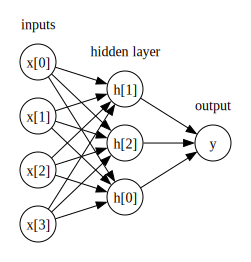

In [203]:
import mglearn

# 은닉층이 1개인 인공신경망
mglearn.plots.plot_single_hidden_layer_graph()

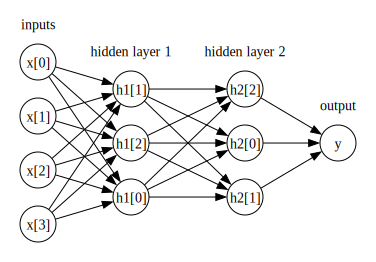

In [4]:
# 은닉층이 2개인 인공신경망
mglearn.plots.plot_two_hidden_layer_graph()

In [5]:
from sklearn.datasets import make_moons

# noise: 표준편차
X, y = make_moons(n_samples = 100, noise = 0.25, random_state=3)


In [7]:
from sklearn.model_selection import train_test_split

# stratify = y: 학습용 데이터와 검증용 데이터에서 각각 타겟값들이 동일한 비율로 나타나도록 함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

Recall 재현율

* Stratify: 모든 계층별 데이터를 1:1로 학습하도록 함
0   1   합계
60  20  80      (수집된 데이터)

20  20  40      under-sampling : 데이터를 버리는 게 아까움
60  60  120     over-sampling (데이터복제/ 좌표를 옮기는 등의 방법 사용) : 과적합 위험

ex) 보이스피싱

* 교차검증 cross-validation : 데이터 샘플수가 적을 때 효과적인 방법
실험을 여러번, 성능 향상됨
ex) 데이터 100개 5fold (5sets)
20  20  20  20  20
test train train train train
train test train 
           test
                test
                        test

In [9]:
X_train[:3]

array([[ 1.31886119, -0.41396289],
       [-0.53369875,  0.50244086],
       [-0.74872343, -0.06972957]])

In [10]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0, max_iter=5000).fit(X_train, y_train)

# MLP : Multi Layer Perceptron 
# 기본 hidden_layer_sizes = (100,) : 은닉층 1개, 은닉층에서 사용할 유닛수(노드)는 100
# max_iter: 최대반복횟수
# 데이터가 매우 적은 상태이므로 100개를 쓰는 것보다 줄이는 것이 좋음
# 은닉 유닛을 줄이면 모델의 복잡도는 낮아짐

In [20]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.925
0.9


Text(0, 0.5, 'class 1')

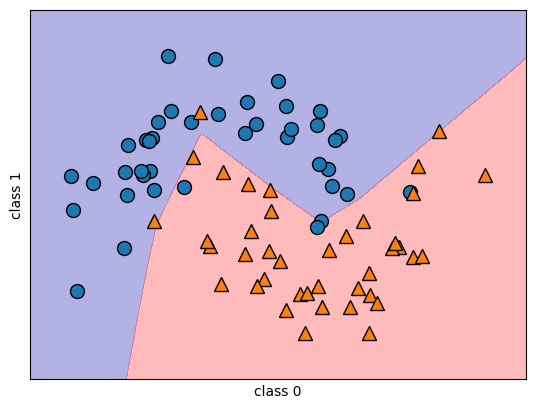

In [13]:
from matplotlib import pyplot as plt
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:,1], y_train)
plt.xlabel('class 0')
plt.ylabel('class 1')

↑ 경계면이 날카로움: 학습이 너무 잘 됨

새로운 데이터 적합이 잘 안될 수 있음

In [14]:
# 은닉유닛(노드수)을 10개로 줄이고 테스트

model10 = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=1000)
model10.fit(X_train, y_train)
print(model10.score(X_train, y_train))
print(model10.score(X_test, y_test))

0.85
0.85


Text(0, 0.5, 'class 1')

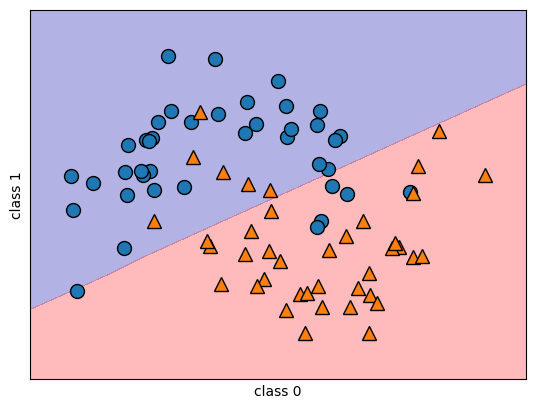

In [15]:
mglearn.plots.plot_2d_separator(model10, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('class 0')
plt.ylabel('class 1')

↑ 정확도는 낮아졌지만, 스무스한 경계선이 됨: 우리는 일반화가 잘 되는 경계선이 필요

In [16]:
# 10개의 유닛으로 된 두개의 은닉층 [10, 10]
model1010 = MLPClassifier(random_state=0, hidden_layer_sizes=[10,10], max_iter= 500)
model1010.fit(X_train, y_train)
print(model1010.score(X_train, y_train))
print(model1010.score(X_test, y_test))

0.8375
0.85


↑ score가 .85로 model10과 동일하지만, 경계선은 훨씬 스무스하게 됨

In [18]:
# 100개의 유닛으로 된 3개의 은닉층 [100,100,100]
model100 = MLPClassifier(random_state=0, hidden_layer_sizes=[100,100,100], max_iter=500)
model100.fit(X_train, y_train)
print(model100.score(X_train, y_train))
print(model100.score(X_test, y_test))

1.0
1.0


Text(0, 0.5, 'class 1')

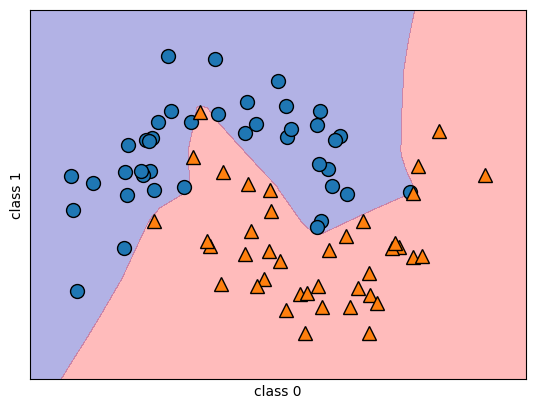

In [19]:
mglearn.plots.plot_2d_separator(model100, X_train, fill = True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('class 0')
plt.ylabel('class 1')

↑ Overfitting됨

model.score : 분류 정확도

#### confusion matrix 
                              실제
                             0      1
    출력(prediction)    0    7      3       0을 틀린 것보다, 1을 틀린 것이 더 심각함
                        1    0      10

                    
#### classification report 

- precision 모형이 얼마나 정확한가
- recall   실제 현상을 얼마나 잘 찾아내는가 : recall이 낮다는 부분을 유심히 봐야 함
- f1-score  

#### 모델 평가방법
- 분류: (객관식) 정확도 accuracy, ROC-curve
- 회귀: (주관식) MSE(평균제곱오차), MAE, RMSE, R-squared(결정계수 0~1)


In [21]:
from sklearn.metrics import confusion_matrix
pred = model10.predict(X_test)
cm = confusion_matrix(y_test, pred)

from sklearn.metrics import classification_report

print(cm)
print(classification_report(y_test, pred))

[[ 7  3]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



## Ⅱ. 퍼셉트론

### ① 단층 퍼셉트론
- 퍼셉트론 : 다수의 신호를 입력으로 받아 하나의 신호를 출력
- 프랑크 로젠블라트가 1957년에 고안한 알고리즘
- 신경망의 기원이 되는 알고리즘    

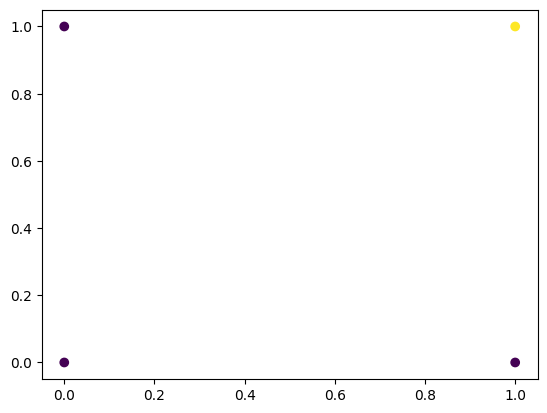

In [22]:
import numpy as np  

X=np.array([(0,0),(0,1),(1,0),(1,1)])  
y=np.array([0,0,0,1])  
plt.scatter(X[:, 0], X[:, 1], c=y)

가중치 : 각 입력 신호가 결과에 영향을 주는 중요도를 조절하는 매개변수

편향 : 한쪽으로 치우쳐 균형을 깬다는 의미,뉴런의 활성화 정도를 조절하는 매개변수

In [23]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])   # 가중치
    b = -0.7    # 절편(편향)
    tmp = np.sum(w*x) + b    # 가중치 곱하고 절편 더한 값
    print(tmp)  
    # 0보다 작으면 0, 아니면 1을 리턴  
    if tmp <= 0:
        return 0
    else:
        return 1
    
for xs in [(0,0), (1,0), (0,1), (1,1)]:
    y = AND(xs[0], xs[1])
    print(xs, '->', y)

-0.7
(0, 0) -> 0
-0.19999999999999996
(1, 0) -> 0
-0.19999999999999996
(0, 1) -> 0
0.30000000000000004
(1, 1) -> 1


Text(0, 0.5, 'class 1')

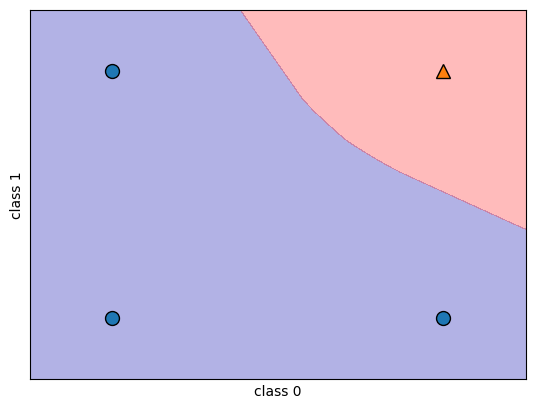

In [32]:
y = [0,0,0,1]
modelAND = MLPClassifier(random_state=0, max_iter= 1000).fit(X,y)
mglearn.plots.plot_2d_separator(modelAND, X, fill = True, alpha=.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('class 0')
plt.ylabel('class 1')

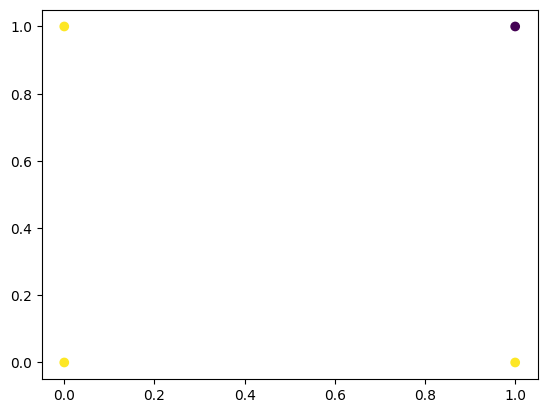

In [25]:
# NAND: NAD의 역산 (Not AND)

X=np.array([(0,0),(0,1),(1,0),(1,1)])  
y=np.array([1,1,1,0])  
plt.scatter(X[:, 0], X[:, 1], c=y)

In [26]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])   # AND와 부호가 다름
    b = 0.7    # AND와 부호가 다름
    tmp = np.sum(w*x) + b    # 가중치 곱하고 절편 더한 값
    # 0보다 작으면 0, 아니면 1을 리턴  
    if tmp <= 0:
        return 0
    else:
        return 1
    
for xs in [(0,0), (1,0), (0,1), (1,1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs), '->', str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


Text(0, 0.5, 'class 1')

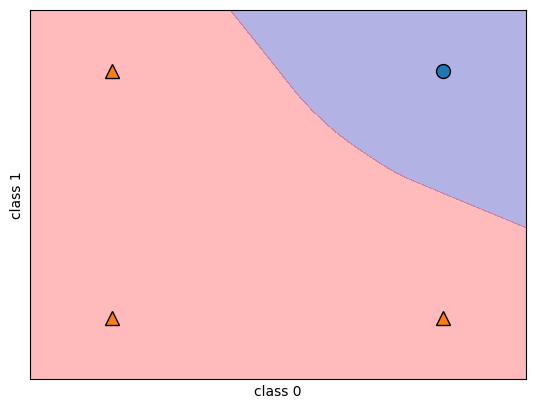

In [38]:
y = [1,1,1,0]
modelNAND = MLPClassifier(random_state=0, max_iter= 1000).fit(X,y)

mglearn.plots.plot_2d_separator(modelNAND, X, fill = True, alpha=.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('class 0')
plt.ylabel('class 1')

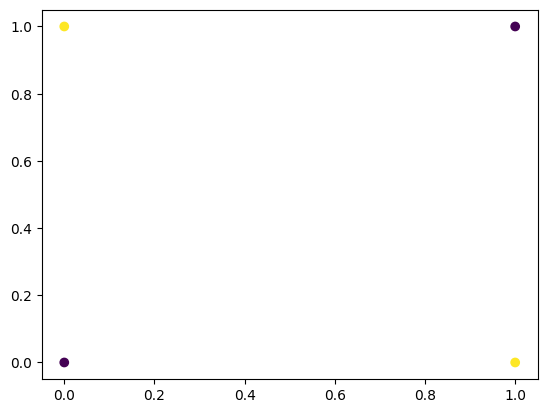

In [36]:
# OR
X=np.array([(0,0),(0,1),(1,0),(1,1)])  
y=np.array([0,1,1,0])  
plt.scatter(X[:, 0], X[:, 1], c=y)

In [41]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2    # AND와 값이 다름
    tmp = np.sum(w*x) + b    # 가중치 곱하고 절편 더한 값
    # 0보다 작으면 0, 아니면 1을 리턴  
    print(tmp)
    if tmp <= 0:
        return 0
    else:
        return 1
    
for xs in [(0,0), (1,0), (0,1), (1,1)]:
    y = OR(xs[0], xs[1])
    print(str(xs), '->', str(y))

-0.2
(0, 0) -> 0
0.3
(1, 0) -> 1
0.3
(0, 1) -> 1
0.8
(1, 1) -> 1


Text(0, 0.5, 'class 1')

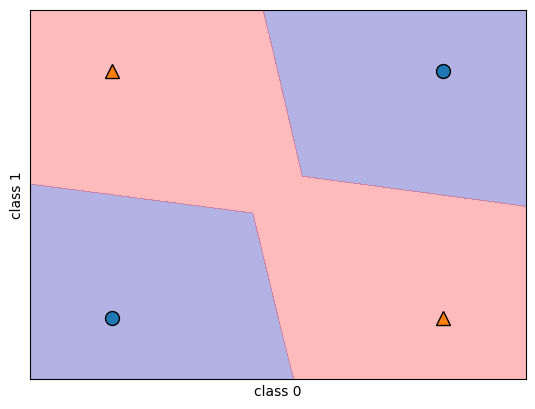

In [37]:
y = [0,1,1,0]
modelOR = MLPClassifier(random_state=0, max_iter= 1000).fit(X,y)

mglearn.plots.plot_2d_separator(modelOR, X, fill = True, alpha=.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('class 0')
plt.ylabel('class 1')

### ② 다층 퍼셉트론
- 단층 퍼셉트론의 한계: XOR문제를 풀 수 없음. 하지만 게이트를 조합하면 가능함

-0.2
-0.19999999999999996
(0, 0) -> 0
0.3
0.30000000000000004
(1, 0) -> 1
0.3
0.30000000000000004
(0, 1) -> 1
0.8
-0.19999999999999996
(1, 1) -> 0


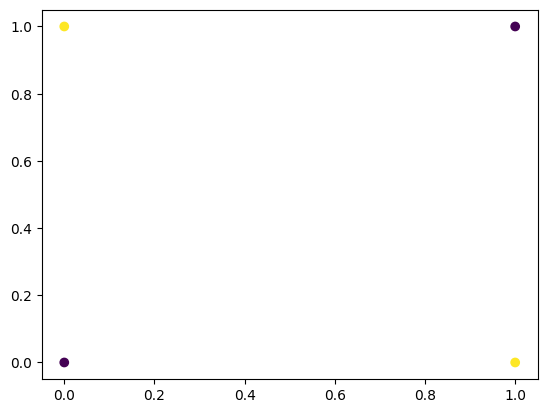

In [39]:
X=np.array([(0,0),(0,1),(1,0),(1,1)])
y=np.array([0,1,1,0])  

plt.scatter(X[:, 0], X[:, 1], c=y)

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

Text(0, 0.5, 'class 1')

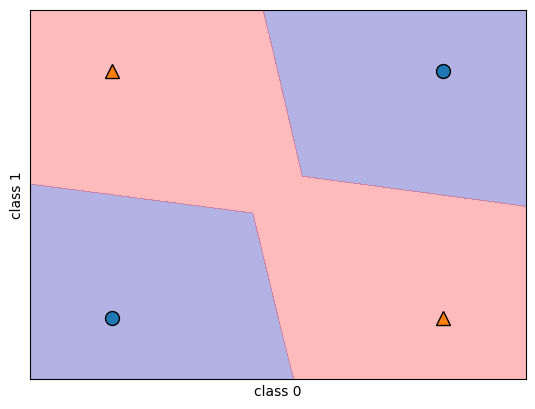

In [42]:
y = [0,1,1,0]
modelXOR = MLPClassifier(random_state=0,max_iter=1000).fit(X, y)  
mglearn.plots.plot_2d_separator(modelXOR, X, fill=True, alpha=.3)  
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("class 0")  
plt.ylabel("class 1")

## Ⅲ. 활성화함수: 입력 신호의 총합을 출력 신호로 변환하는 함수

직선으로 나오는 결과를 변환하고 싶음

     (input) >>>>>>>>>>>>>> (hidden) >>>>>>>>>>>>> output

     활성화함수  relu               linear    회귀분석 (항등함수, 직선에서 변경할필요 없을 때)

            tanh -1.0 ~ 1.0         sigmoid   0.0 ~ 1.0  이진분류 (폭이좁음)
            
                 순환신경망         softmax   다중분류

### ① 계단함수
- 0보다 크면 1, 작으면 0

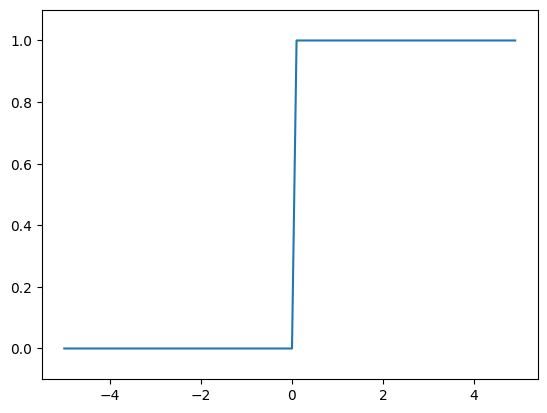

In [43]:
def step_function(x):
    return np.array(x>0, dtype = np.int32)

X = np.arange(-5.0, 5.0, 0.1)
y = step_function(X)
plt.plot(X,y)
plt.ylim(-0.1, 1.1) 
plt.show()

### ② 시그모이드함수
- S자 모양의 함수
- 0이나 1에 가까울 경우, 학습이 잘 안 됨. 기울기소실 문제


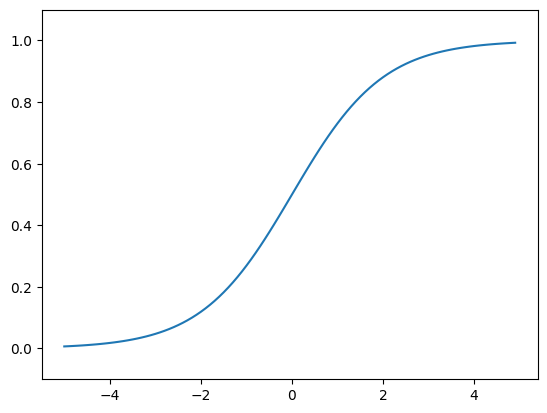

In [44]:
# y = np.exp(x) : y = e^x

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

y = sigmoid(X)
plt.plot(X,y)
plt.ylim(-0.1, 1.1) 
plt.show()

### ③ ReLU함수 Rectified Linear Unit
- 입력이 0보다 크면 그대로, 0 이하면 0
- 단점: 음수값이 무시됨 (→ leaky ReLU로 개선), 0에서 미분안됨(→ GeLU로 개선)
- hidden layer에 많이 사용


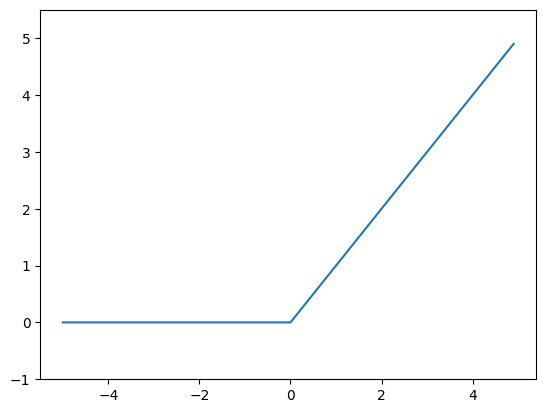

In [45]:
def relu(x):
    return np.maximum(0, x)

y = relu(X)
plt.plot(X,y)
plt.ylim(-1.0, 5.5)
plt.show()

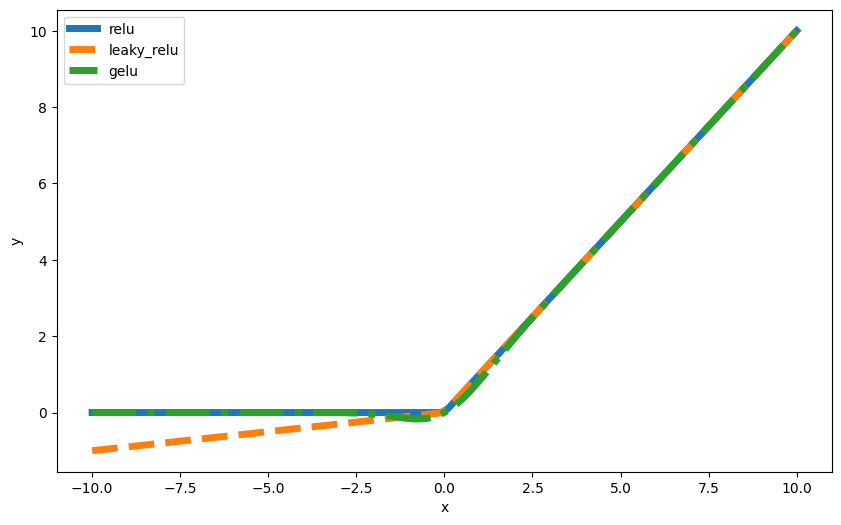

In [50]:
### leaky ReLU  /  GeLU

import math

def relu(x):
    values=[]
    for i in x:
        if i > 0:
            values.append(i)
        else:
            values.append(0)          
    return values 
    
def leaky_relu(x, g):
    values=[]
    for i in x:
        if i > 0:
            values.append(i)
        else:
            values.append(g * i)    
    return values 

def gelu(x):
    return [0.5 * z * (1 + math.tanh(math.sqrt(2 / np.pi) * (z + 0.044715 * math.pow(z, 3)))) for z in x]

x=np.linspace(-10,10,100)

plt.figure(figsize=(10,6))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,relu(x),label='relu',ls='-',lw='5')
plt.plot(x,leaky_relu(x,0.1),label='leaky_relu',ls='--',lw='5')
plt.plot(x,gelu(x),label='gelu',ls='-.',lw='5')
plt.legend(labels=['relu','leaky_relu','gelu'])
plt.show()

### ④ tanh함수 : Hyperbolic Tangent
- 확장된 시그모이드함수
- 시그모이드는 0~1, tanh은 -1~1 
- 시그모이드보다 출력범위가 넓고 경사면이 더 가파르므로, 더 빠르게 수렴하여 학습 가능


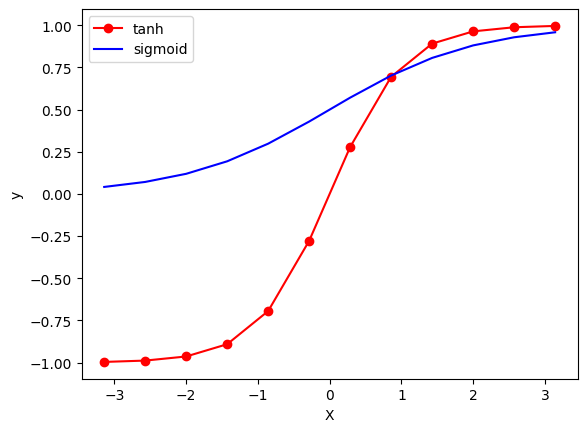

In [49]:
X = np.linspace(-np.pi, np.pi, 12)
y = np.tanh(X)
y_sig = sigmoid(X)

plt.plot(X,y, c='r', marker = 'o')
plt.plot(X,y_sig, c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(('tanh', 'sigmoid'))
plt.show()

- 지도학습

- 비지도학습: 유사도(거리)로 계산

- 강화학습

### ⑤ 행렬의 곱셈
- 신경망의 연산에는 행렬을 사용

In [70]:
a=np.array([[1,2],[3,4]])
print(a.shape), print(a)

b=np.array([[5,6],[7,8]])
print(b.shape), print(b)

print(np.dot(a,b))

(2, 2)
[[1 2]
 [3 4]]
(2, 2)
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]


In [71]:
#행렬의 곱셈
a=np.array([[1,2,3],[4,5,6]])
print(a.shape), print(a)

b=np.array([[1,2],[3,4],[5,6]])
print(b.shape), print(b)

print(np.dot(a,b))

(2, 3)
[[1 2 3]
 [4 5 6]]
(3, 2)
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


In [72]:
a=np.array([[1,2,3],[4,5,6]])
c=np.array([[1,2],[3,4]])
np.dot(a,c)
# 2행 3열 x 2행 2열 에러
# 앞행렬의 열과 뒤 행렬의 행이 같아야 함

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [51]:
### 활성화함수 활용해보기

x = np.array([1, 0.5])  # 입력값

# 첫번째 은닉층의 작업
w1=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #가중치
b1=np.array([0.1, 0.2, 0.3]) #편향
a1=np.dot(x,w1)+b1 #첫번째 은닉층의 합계값
z1=sigmoid(a1)  #활성화함수를 통해 변화
print(a1)
print(z1)

# 두번째 은닉층의 작업
w2=np.array([[0.1, 0.4], [0.2, 0.5],[0.3, 0.6]]) #가중치
b2=np.array([0.1, 0.2]) #편향
a2=np.dot(z1,w2)+b2 #두번째 은닉층의 합계값
z2=sigmoid(a2)  #활성화함수

print(a2)
print(z2)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### ⑥ 항등함수
- 항상 성립하는 등식,집합 X의 원소와 이에 대응하는 집합 Y의 원소가 항상 같음

In [52]:
def identity_function(x): #항등함수
    return x

w3=np.array([[0.1, 0.3], [0.2, 0.4]])
b3=np.array([0.1, 0.2])
a3=np.dot(z2,w3)+b3
y=identity_function(a3) #출력층의 활성화함수로 항등함수를 사용

print(y)

[0.31682708 0.69627909]


### ⑦ 소프트맥스함수
- n: 출력층 노드수
- 분자: 입력신호의 지수함수
- 분모: 모든 입력신호의 지수함수의 합
$$y_k = \frac{exp(a_k)}{\sum^{n}_{i=1}exp(a_i)}$$

- 출력층의 활성화함수
(회귀) 항등함수 / (분류) 소프트맥스

In [53]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)

y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [58]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
print(softmax(a))

[0.01821127 0.24519181 0.73659691]


In [59]:
a = np.array([1000, 1100, 1200])
print(softmax(a))    # 무한대 문제가 발생
# exp(10)은 20000이 넘음. exp(100)은 0이 40개가 넘고, exp(1000)은 무한히 큼. 
# 컴퓨터가 계산하기 어려운 오버플로문제 발생

[nan nan nan]


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11700\1278484596.py:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11700\1278484596.py:4: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


In [68]:
np.exp(10), np.exp(100)

(22026.465794806718, 2.6881171418161356e+43)

In [60]:
a = np.array([1010, 1000, 900])
print(softmax(a))    # 무한대 문제가 발생

[nan nan nan]


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11700\1278484596.py:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11700\1278484596.py:4: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


In [61]:
# 무한대 문제의 해결 
c = np.max(a)
print(a-c)
print(softmax(a-c))

[   0  -10 -110]
[9.99954602e-01 4.53978687e-05 1.68883521e-48]


In [62]:
# 무한대 문제를 해결한 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
print(softmax(a))

[0.01821127 0.24519181 0.73659691]


In [63]:
a = np.array([1000, 1100, 1200])
print(softmax(a)) 

[1.38389653e-87 3.72007598e-44 1.00000000e+00]


In [64]:
a = np.array([1010, 1000, 900])
print(softmax(a))

[9.99954602e-01 4.53978687e-05 1.68883521e-48]


↑
9.9.. × 10^(-1) ≒ 0.99

4.53.. × 10^(-5) ≒ 0

1.68.. × 10^(-48) ≒ 0

답은 첫번째값이 됨

In [65]:
np.sum(softmax(a))    # softmax 함수 출력의 총합은 1이 됨. 즉, softmax함수 결과값은 확률로 해석 가능

1.0

In [66]:
# 확률이 가장 높은 값
idx = np.argmax(softmax(a))    #최대값의 인덱스
a[idx]

1010

## Ⅳ. 손실함수
- 오차를 측정하는 함수
- MSE                         회귀
  Categorical Cross entropy   다중분류
  Binary Cross entropy        이진분류

① 평균제곱오차 MSE
- (출력값-정답) 의 제곱의 합계를 데이터의 개수로 나눈 값

- 실제값       10   7   6   5

  출력값        3   9   4   2

  오차          7  -2   2   3

  오차제곱     49   4   4   9  

  오차절대값    

  MSE(평균)                      단점: 제곱을 평균하게 되므로 연산비용이 많이 듦   

  RMSE(평균제곱근)          
  
  MAE(평균)

In [73]:
def mean_squared_error(y,t):      # y: 예측값, t: 실제값
    return 0.5*np.sum((y-t)**2)   # 2 class인 경우로 가정하고 0.5 곱함
    # class의 개수가 n개일 때 1/n을 곱해야 함

# 인덱스 2를 정답으로 계산한 MSE
t = np.array([0,0,1,0,0,0,0,0,0,0])    # 실제값
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])    # 출력값
print(mean_squared_error(y,t))

0.09750000000000003


In [74]:
# 인덱스 7을 정답으로 계산한 MSE
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(mean_squared_error(y,t))

0.5975


② 크로스엔트로피 오차
- 엔트로피: 정보를 최적으로 인코딩하기 위해 필요한 비트 수. 정보의 양. 
혼잡도가 높으면 1, 정리가 잘 됐으면 0

- 오늘이 무슨 요일인지 bit로 표현하려면? 3비트 필요

          월  화  수  목   금  토  일
          
          000 001 010 011 100 101 110

- 교차엔트로피 오차(cross entropy error)

$ y_k $ : 신경망의 출력

$ t_k $ : 정답 레이블

- 정답레이블이 2이고 신경망의 출력결과가 0.6이라면

교차엔트로피오차는 $-log0.6=0.51$ 

신경망 출력이 0.1이라면 $ -log0.1=2.30 $

정답일 때의 출력으로 전체 값이 결정됨. t가 0일때는 곱하기가 0이 되기 때문에 연산속도가 빨라짐

따라서 평균제곱오차보다 교차엔트로피 오차를 더 많이 사용함

In [76]:
def cross_entropy_error(y,t): # y: 예측값, t: 실제값
    delta = 1e-7              # 값이 무한대가 되거나 0이 되지 않도록 빼주는 값
    return -np.sum(t * np.log(y+delta))

In [77]:
t = np.array([0,0,1,0,0,0,0,0,0,0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
cross_entropy_error(y,t)

0.510825457099338

## Ⅴ. 미분
- 미분: 한순간의 변화량
- 100m를 20초에 달린다고 할 때, 100/20 = 5, 1초에 5m를 달린다고 할 수 있음
- 0.1초, 0.01초, 0.001초 게속 간격 줄여서 어느 순간의 속도를 계산한다면?

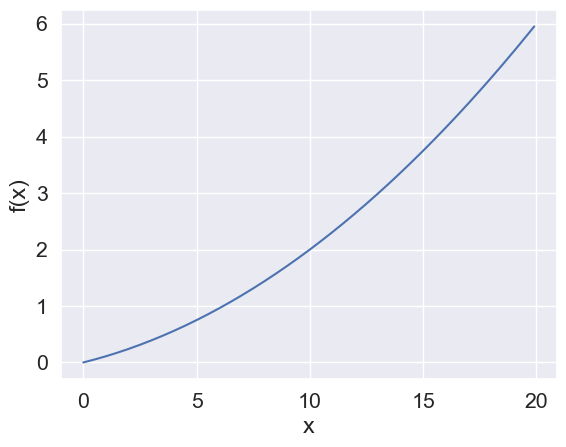

In [209]:
# x를 중심으로 전후의 차분 계산
def numerical_diff(f,x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

# 2차방정식
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [210]:
1e-4

0.0001

In [211]:
#x가 1일 때의 미분값
print('x=1일 때 미분값' ,numerical_diff(function_1, 1))
#x가 5일 때의 미분값
print('x=5일 때 미분값' ,numerical_diff(function_1, 5))
#x가 10일 때의 미분값
print('x=10일 때 미분값' ,numerical_diff(function_1, 10))

x=1일 때 미분값 0.11999999999998123
x=5일 때 미분값 0.1999999999990898
x=10일 때 미분값 0.2999999999986347


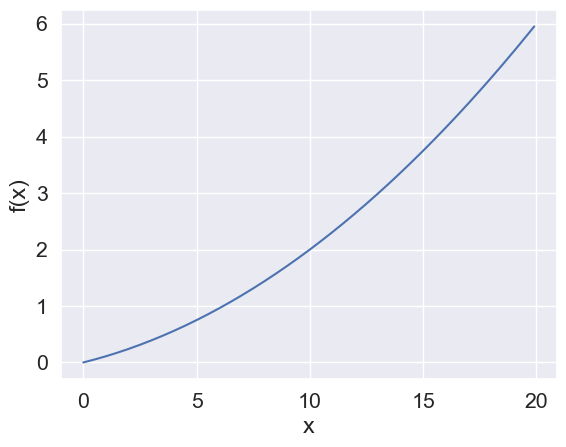

In [214]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

X = np.arange(0.0, 20.0, 0.1)
y = function_1(X)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(X,y)
plt.show()

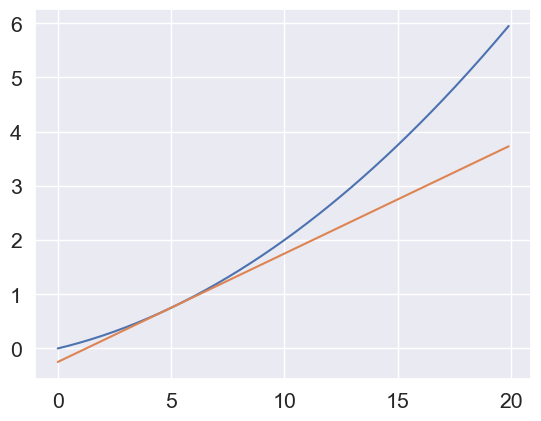

In [215]:
# x가 5일 때 미분값: 0.1999999999990898
# x=5에서의 접선

tf = tangent_line(function_1, 5)
y2 = tf(X)ㅠ
plt.plot(X, y) #곡선
plt.plot(X, y2) #직선
plt.show()

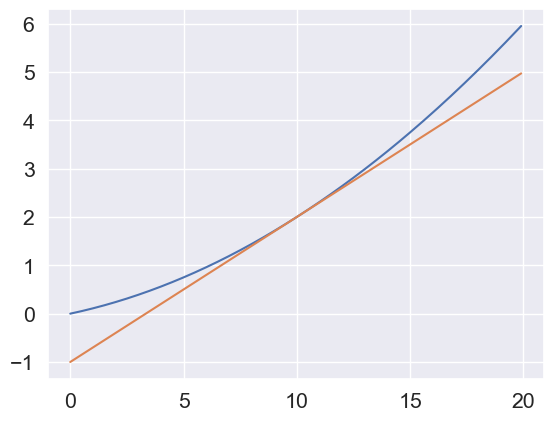

In [216]:
# x=10에서의 접선
tf = tangent_line(function_1, 10)
y2 = tf(X)
plt.plot(X, y) #곡선
plt.plot(X, y2) #직선
plt.show()

#### 경사하강법
- 기울기를 조금씩 변화시켜 가면서 가장 손실률이 낮은 값을 찾는 방법
- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동 - 기울기를 구한다
- 오차가 최소인 기울기를 찾는 방법
- 갱신하는 양을 학습률이라고 함. 한번의 학습에 얼마큼 학습을 할지 결정, 매개변수 값을 얼마나 갱신할 것인가?

## Ⅵ. 오존량 예측 실습

In [ ]:
# ozone2.csv 데이터 활용 실습
# x: Solar.R, Wind, Temp 
# y: Result 
# 언더샘플링해서 신경망에 넣어 결과 확인 (정규화ㅏ)

In [78]:
import pandas as pd
df = pd.read_csv('Data/ozone2.csv')
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


In [82]:
x = df.iloc[:,2:5]
y = df.iloc[:,-1] 
x, y

(     Solar.R  Wind  Temp
 0        8.0   9.7    59
 1       25.0   9.7    61
 2       78.0  18.4    57
 3       48.0  14.3    80
 4       49.0  10.3    69
 ..       ...   ...   ...
 148    223.0   5.7    79
 149    225.0   2.3    94
 150    255.0   4.0    89
 151    269.0   4.1    84
 152    238.0   3.4    81
 
 [153 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 148    1
 149    1
 150    1
 151    1
 152    1
 Name: Result, Length: 153, dtype: int64)

<Axes: xlabel='Result', ylabel='count'>

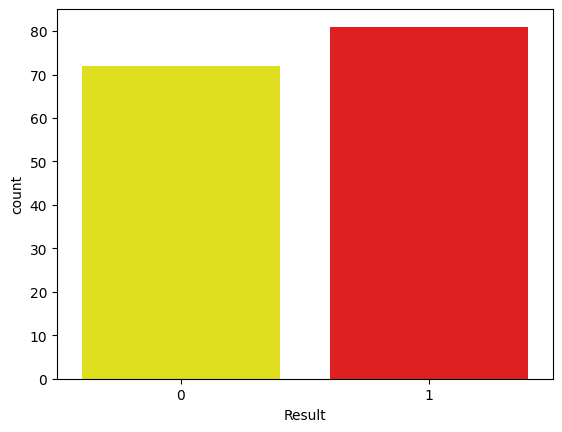

In [92]:
import seaborn as sns
colors = ['yellow','red']
sns.countplot(x = 'Result', data = df, palette = colors)

c:\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


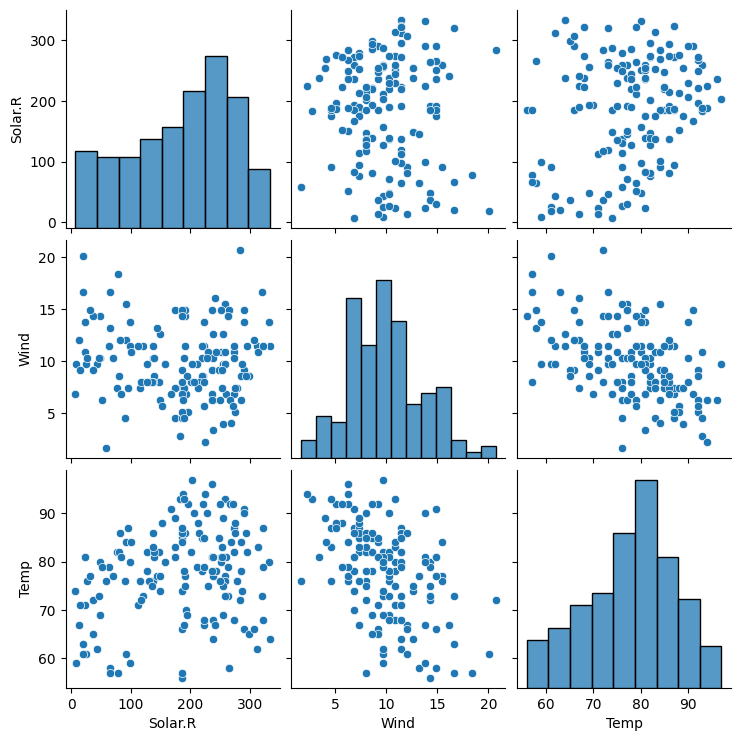

In [102]:
sns.pairplot(x, diag_kind = 'hist')

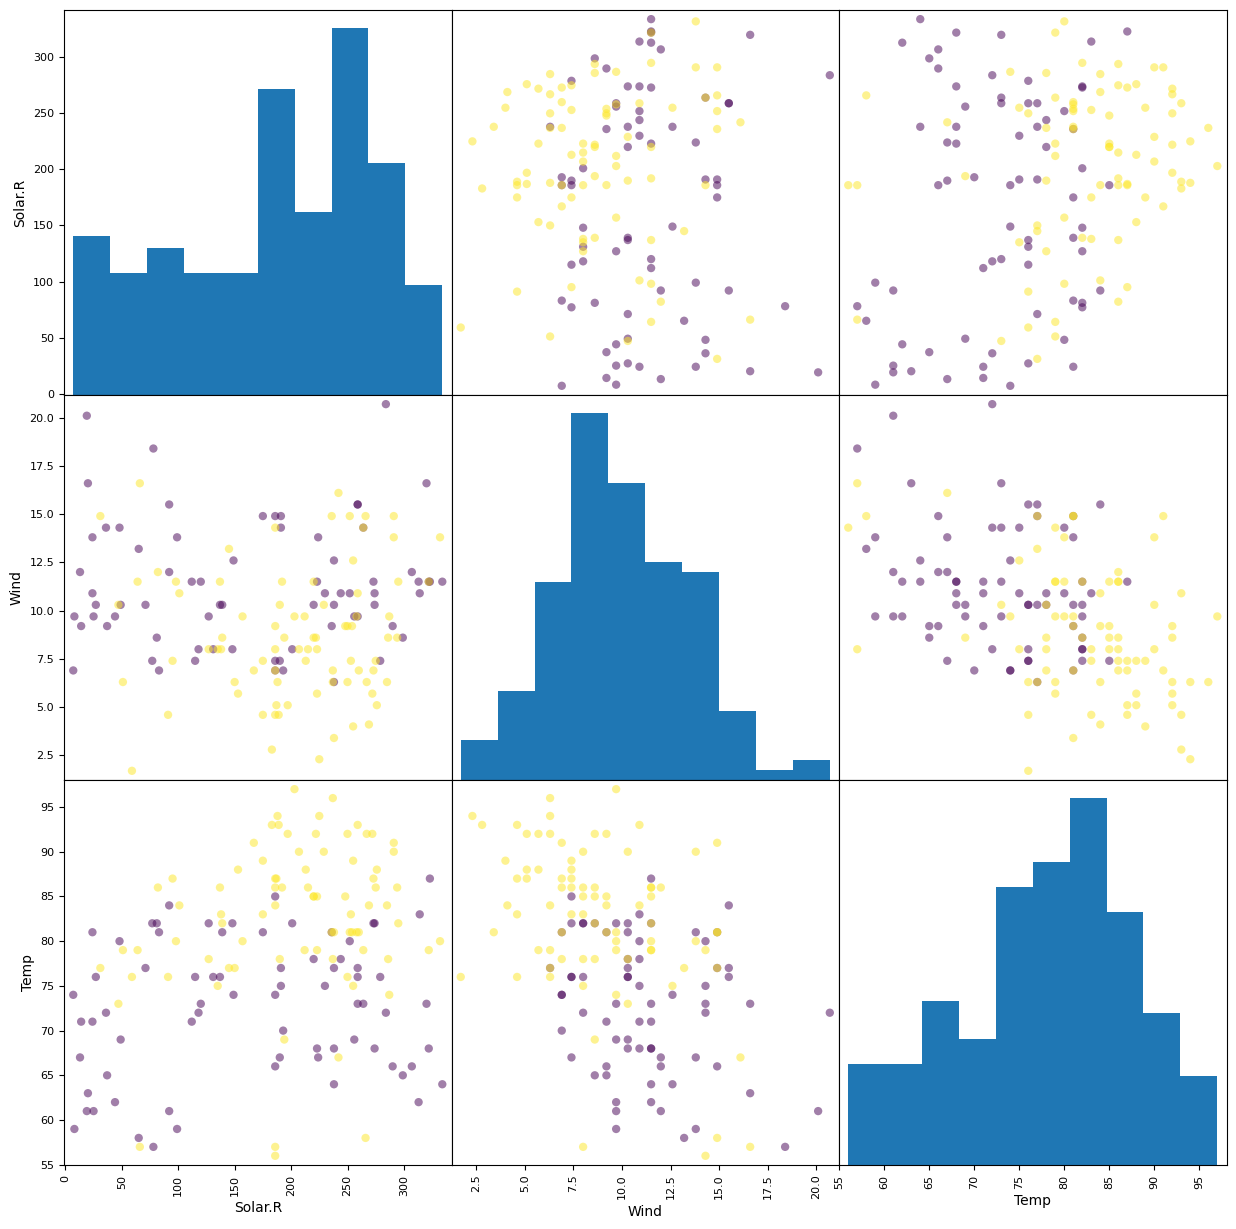

In [101]:
pd.plotting.scatter_matrix(x, c=y, figsize = (15,15), marker='o')
plt.show()

In [104]:
x.columns

Index(['Solar.R', 'Wind', 'Temp'], dtype='object')

In [105]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state = 0).fit_resample(x,y)
x_samp = pd.DataFrame(data = x_sample, columns = x.columns)
y_samp = pd.DataFrame(data = y_sample, columns = ['Result'])
df_samp = pd.concat([x_samp, y_samp], axis = 1)
df_samp['Result'].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [111]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x_samp, y_samp, test_size = 0.2, random_state = 10)
model = MLPClassifier(random_state = 0)
model.fit(x_tr, y_tr)
pred = model.predict(x_ts)
print('학습용:', model.score(x_tr, y_tr))
print('검증용:', model.score(x_ts, y_ts))

학습용: 0.7043478260869566
검증용: 0.8275862068965517


c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [117]:
type(pred), type(y_ts)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [127]:
np.mean(pred == y_ts.Result)

0.8275862068965517

In [133]:
np.mean(pred == y_ts.values)

0.4994054696789536

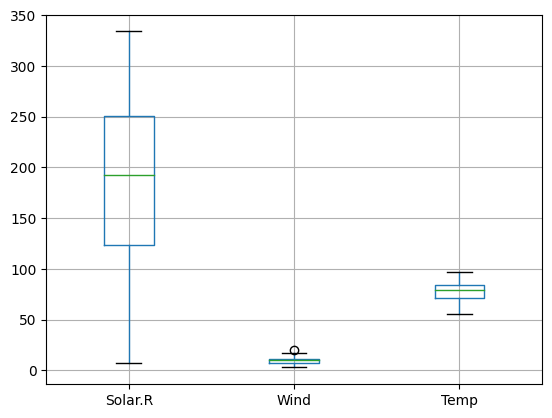

In [128]:
x_tr.boxplot()
plt.show()

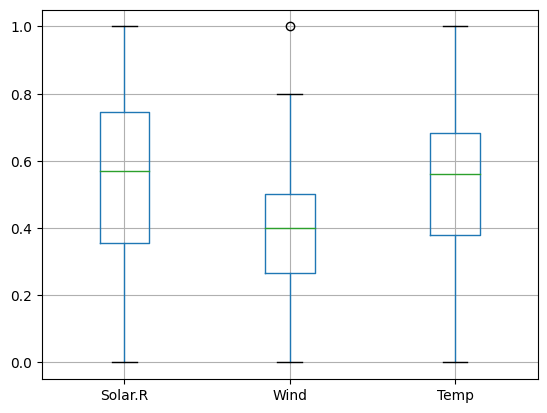

특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64


In [136]:
### normalization 정규화. 모든 변수의 값이 0~1 값을 갖도록 조정
# 변수의 범위를 왜곡하지 않음. model하우스
# MinMaxScaler: ( 특정값 - 최소값 ) / ( 최대값 - 최소값 )

# 학습용데이터셋에서 특성별 최소값 계산
min_on_training = x_tr.min(axis = 0)

# 학습용데이터셋에서 특성별 (최대값-최소값) 범위 계산
range_on_training = (x_tr - min_on_training).max(axis = 0)

# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면, 각 특성에 대해 최소값은 0, 최대값은 1로 조정됨
x_tr_scaled = (x_tr - min_on_training) / range_on_training

# 검증용 데이터셋에 동일 적용
x_ts_scaled = (x_ts - min_on_training) / range_on_training

x_tr_scaled.boxplot()
plt.show()
print('특성별 최소값\n{0}'.format(x_tr_scaled.min(axis = 0)))
print('특성별 최대값\n{0}'.format(x_tr_scaled.min(axis = 0)))

In [140]:
model.fit(x_tr_scaled, y_tr)
pred = model.predict(x_ts_scaled)
print('학습용:', model.score(x_tr_scaled, y_tr.Result))
print('검증용:', model.score(x_ts_scaled, y_ts.Result))
print('검증용:', np.mean(pred == y_ts.Result))

학습용: 0.7391304347826086
검증용: 0.7931034482758621
검증용: 0.7931034482758621


c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [141]:
### Standardization 표준화, 평균0 표준편차1
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있음 (1000원 vs 1달러)
# 데이터를 0을 중심으로 양쪽으로 분포시킴. 평균으로부터 얼마나 떨어져있는가
# k-means, SVM 등 거리 기반의 모델에서 주로 사용함
# (측정값 - 평균) / 표준편차

mean_on_train = x_tr.mean(axis = 0)
std_on_train = x_tr.std(axis = 0)

x_tr_scaled = (x_tr - mean_on_train) / std_on_train
x_ts_scaled = (x_ts - mean_on_train) / std_on_train
print(x_tr_scaled.describe())
print(x_ts_scaled.describe())

            Solar.R          Wind          Temp
count  1.150000e+02  1.150000e+02  1.150000e+02
mean   9.847196e-17  4.981522e-16  6.217249e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.017401e+00 -2.122033e+00 -2.361740e+00
25%   -6.728957e-01 -7.450022e-01 -6.669730e-01
50%    1.291912e-01 -5.648689e-02  1.530758e-01
75%    7.985587e-01  4.823512e-01  6.997749e-01
max    1.756447e+00  3.056800e+00  2.121193e+00
         Solar.R       Wind       Temp
count  29.000000  29.000000  29.000000
mean    0.146647   0.217061  -0.005278
std     1.076194   1.191784   1.108749
min    -1.809666  -2.451323  -2.252401
25%    -0.770993  -0.565390  -0.502963
50%     0.290763   0.123126   0.043736
75%     0.890885   0.811641   0.699775
max     1.733365   3.236412   1.683833


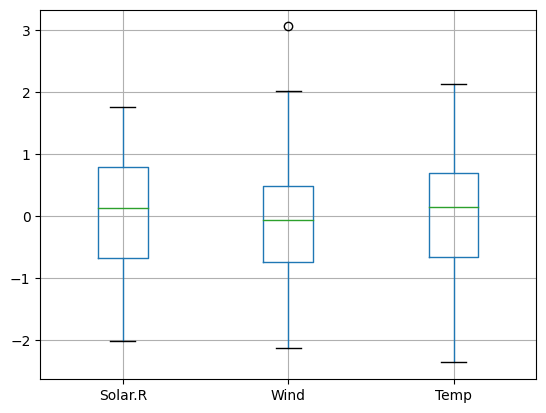

In [142]:
x_tr_scaled.boxplot()
plt.show()

In [143]:
model.fit(x_tr_scaled, y_tr)
pred = model.predict(x_ts_scaled)
print('학습용:', model.score(x_tr_scaled, y_tr.Result))
print('검증용:', model.score(x_ts_scaled, y_ts.Result))
print('검증용:', np.mean(pred == y_ts.Result))

학습용: 0.7652173913043478
검증용: 0.7241379310344828
검증용: 0.7241379310344828


c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [148]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_ts, pred)
df_cm = pd.DataFrame(cm, index = [0,1], columns = [0,1])
df_cm

,0,1
0,10,4
1,4,11


<Axes: title={'center': 'Confusion Matrix'}>

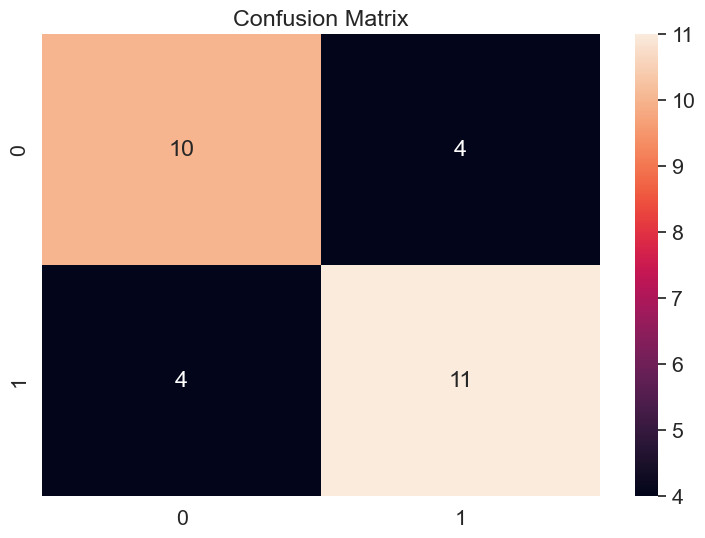

In [149]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

#### MLPClassifier 파라미터 정리
- validation_fractiont, 기본값 = 0.1

  학습 조기 중지를 위한 validation dataset의 비율. 0~1 사이, early_stopping이 True 인 경우에만 사용

- verbose : 진행 상태 출력 여부
- solver {'lbfgs','sgd','adam'}, 기본값 ='adam'  가중치를 최적화하기 위한 옵션

  'lbfgs': 유사 뉴턴 방식(작은 데이터에 적합)

  'sgd': 확률적 경사 하강법

  'adam': 대량의 데이터셋에서 잘 작동하는 방식

- tol : 최적화에 대한 허용 오차, 기본값 1e-4, 손실 또는 점수가 tol 만큼 개선되지 않으면 수렴에 도달한 것으로 간주하고 학습을 중지하게 됨

- momentum : 경사하강법에서 사용, solver='sgd'인 경우 사용 0~1 사이의 값
- power_t, 기본값 = 0.5

  역스케일링 학습률의 지수. 효과적인 학습 속도를 업데이트하는 데 사용됨, solver = 'sgd'일 때만 사용
- n_iter_no_change: solver='sgd' 'adam'인 경우에 효과적
  더이상 개선되지 않는 epoch의 최대값
- max_iter : 기본값 200
- beta_1 : solver='adam'인 경우에 사용, 기본값 0.9
- beta_2 : solver='adam'인 경우에 사용, 기본값 0.999
- Epsilon : 수치 안정성을 위한 오차값(임의의 작은 실수값)
- learning_rate : 커지면 보정을 강하게 하여 복잡한 모형이 되고 작아지면 일반적인 모형이 됨
- max_fun : 기본값 15000, solver='lbfgs'일 때만 사용됨, 최대 손실함수 호출수

## Ⅵ. 대용량 데이터 학습
####  메모리 부족 문제 

① 서버 용량 증설

② 학습용 데이터를 적게 설정

③ 분산처리시스템 (hadoop, spark)

In [151]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [152]:
# 데이터를 섞기
idx = np.arange(X.shape[0])
np.random.seed(0)
np.random.shuffle(idx)  # 재현성
X = X[idx]
y = y[idx]

In [153]:
from sklearn.preprocessing import StandardScaler   # 평균 0, 표준편차 1
scaler = StandardScaler()
scaler.fit(X)                  # fit: 패턴분석
X = scaler.transform(X)        # transform: 변환
# 패턴분석+변환: fit_transform() 한꺼번에 하기도 함. 학습용에만 fit적용

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# 하이퍼파라미터
params = {
    'hidden_layer_sizes': [(10,), (50,), (100,),   
                           (10,10), (50,50), (100,100)],
    # hidden_layer_sizes: 은닉층 갯수 & 노드 수 (10,): 은닉층1개, 노드10개 / (10,10): 은닉층10개, 노드10개
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.01],
}

model = MLPClassifier(random_state=0, max_iter=5000)

clf = GridSearchCV(model, param_grid=params, cv=3)   # for문을 돌릴 것을 한꺼번에 수행
    # cv: 교차검증. 전체데이터를 3세트로 나누어 학습
clf.fit(X, y)
print(clf.best_score_)      # 최고점수
print(clf.best_params_)     # 최적파라미터
print(clf.best_estimator_)  # 최적파라미터 적용한 모델

0.9733333333333333
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=5000,
              random_state=0)


In [155]:
from sklearn.model_selection import train_test_split

# 학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)    

In [168]:
### Generator
# 메모리는 절약할 수 있지만 실행시간이 더 오래 걸릴 수 있음  ex) 쇼핑몰. 재고 두지 않고 주문 시 생산
def make_numbers(n):
    while n < 6:
        yield n   # yield: 메모리에 저장하지 않고 호출한 곳으로 값을 보냄(return과 비슷한 역할)
        n += 1   

for i in make_numbers(0):
    print(i)    

0
1
2
3
4
5


In [169]:
# Generator 예시
import sys
# 리스트: 모든 데이터를 메모리에 적재, 데이터가 늘어나면 메모리 사용량이 증가
a = [i for i in range(100)]
print(sys.getsizeof(a))        # getsizeof: 메모리사이즈(bytes)
b = [i for i in range(1000)]
print(sys.getsizeof(b))

# generator expression () : generator 함수를 좀더 쉽게 사용할 수 있도록 제공되는 표현식
# 모든 데이터를 메모리에 적재하지 않고 조금씩 메모리에 적재, 메모리를 효율적으로 사용할 수 있음
# 호출하는 시점에 만들고 버려라
# 소괄호 또는 yield명령어로 실행
c = (i for i in range(100))   # tuple이 아님
print(sys.getsizeof(c))
d = (i for i in range(1000))
print(sys.getsizeof(d))

920
8856
112
112


In [160]:
import time
def func_sleep(x):
    print('1초 멈춤...')
    time.sleep(1)
    return x

# 리스트 사용
items1 = [func_sleep(x) for x in range(5)]

# generator 생성  :  필요할 때만 쓰이고 처음부터 사용되지 않음
items2 = (func_sleep(y) for y in range(5))

1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...


In [161]:
# 리스트를 사용하면 리스트의 모든 원소를 한꺼번에 처리한 후 최종 결과가 출력됨    
%%time
for i in items1:
    print(i)

0
1
2
3
4
CPU times: total: 0 ns
Wall time: 0 ns


In [162]:
# generator를 사용하면 수행 시간이 긴 연산을 한꺼번에 수행하지 않고 조금씩 수행함 
# 속도보다 메모리 용량 확보가 중요할 때 사용
%%time
for i in items2:
    print(i)

1초 멈춤...
0
1초 멈춤...
1
1초 멈춤...
2
1초 멈춤...
3
1초 멈춤...
4
CPU times: total: 15.6 ms
Wall time: 5.05 s


In [163]:
print('메모리 사용량:',sys.getsizeof(items1))   # 리스트 사용시 : 메모리가 늘어남
print('메모리 사용량:',sys.getsizeof(items2))   # generator 사용시 : 메모리가 늘어나지 않음

메모리 사용량: 120
메모리 사용량: 112


In [164]:
### generator 적용 비교

# 일반적인 방식(한꺼번에 처리하는 방식)
from sklearn.metrics import accuracy_score
clf=MLPClassifier(max_iter=5000, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)


0.9666666666666667

In [165]:
# 메모리 절약하는 방식
# 전체 데이터를 보내지 않고 10개씩 조금씩 보내서 처리
# batch(X_train, y_train, 10)

def batch(X1, y1, n):
    x_size=len(X1)
    for idx in range(0, x_size, n):
        yield X1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)] 

# 10개씩 12회로 나누어 처리
# 시간은 더 오래 걸릴 수 있으나 메모리를 절약할 수 있는 방법임
clf2 = MLPClassifier(random_state=0)
points_tr=[]
points_te=[]
samp = batch(X_train, y_train, 10)
for idx, (chunk_X, chunk_y) in enumerate(samp):   # index와 데이터를 리턴하는 함수
    print(idx)
    # 부분적으로 학습, 처음에는 정확도가 낮지만 점차 향상됨
    clf2.partial_fit(chunk_X, chunk_y, classes=[0, 1, 2])   # partial_fit: 부분학습, 학습결과누적
    pred = clf2.predict(X_train)
    point=accuracy_score(y_train, pred)
    points_tr.append(point)
    print('학습용:',point)
    pred = clf2.predict(X_test)
    point=accuracy_score(y_test, pred)
    points_te.append(point)
    print('검증용:',point)
    # 최종정확도는 일반적인 방법보다 높지 않음

0
학습용: 0.48333333333333334
검증용: 0.5
1
학습용: 0.525
검증용: 0.5333333333333333
2
학습용: 0.6416666666666667
검증용: 0.6333333333333333
3
학습용: 0.725
검증용: 0.7
4
학습용: 0.7833333333333333
검증용: 0.7333333333333333
5
학습용: 0.825
검증용: 0.7666666666666667
6
학습용: 0.8416666666666667
검증용: 0.7666666666666667
7
학습용: 0.8333333333333334
검증용: 0.8
8
학습용: 0.85
검증용: 0.8
9
학습용: 0.8583333333333333
검증용: 0.8
10
학습용: 0.8583333333333333
검증용: 0.8
11
학습용: 0.8583333333333333
검증용: 0.8


### 학습방법

batch 학습      배치(일괄처리): 메모리가 충분하면 제일 빠르고 좋은 방법

mini_batch      미니배치: 10만장을 1000개씩 돌림. 일반적인 방식

online          1건씩 처리

ex) 수박 100통 주문받았을 경우 10개씩 10box: 미니배치 / 100통 한꺼번에 배송: 배치 / 1통씩 배송: online

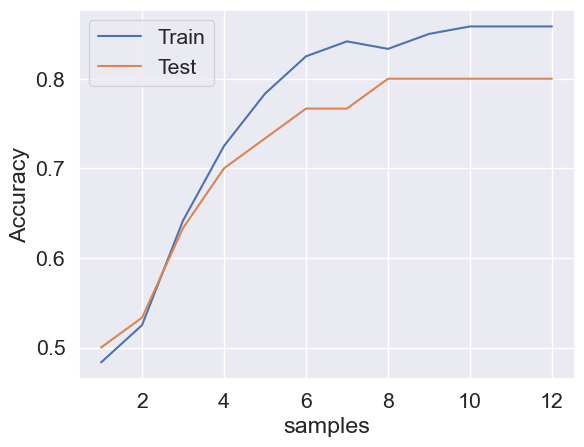

In [167]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"]=15
plt.plot(range(1,13), points_tr, label="Train")
plt.plot(range(1,13), points_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("samples")
plt.legend()
plt.show()

** Tensorflow
pip install tensorflow  : cpu버전
pip install : gpu버전
CUDA Toolkit archive, python 최신버전으로는 GPU사용 안 됨

tensorlow   keras    GPU지원됨
pytorch     페이스북 GPU지원됨

## 와인품질 분류

In [170]:
df = pd.read_csv('Data/wine/wine_new.csv')

In [172]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7,3,0


In [176]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [193]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [173]:
df['class'].value_counts()

class
1    855
0    744
Name: count, dtype: int64

In [174]:
train_cols = df.columns[:11]
x = df[train_cols]
y = df['class']

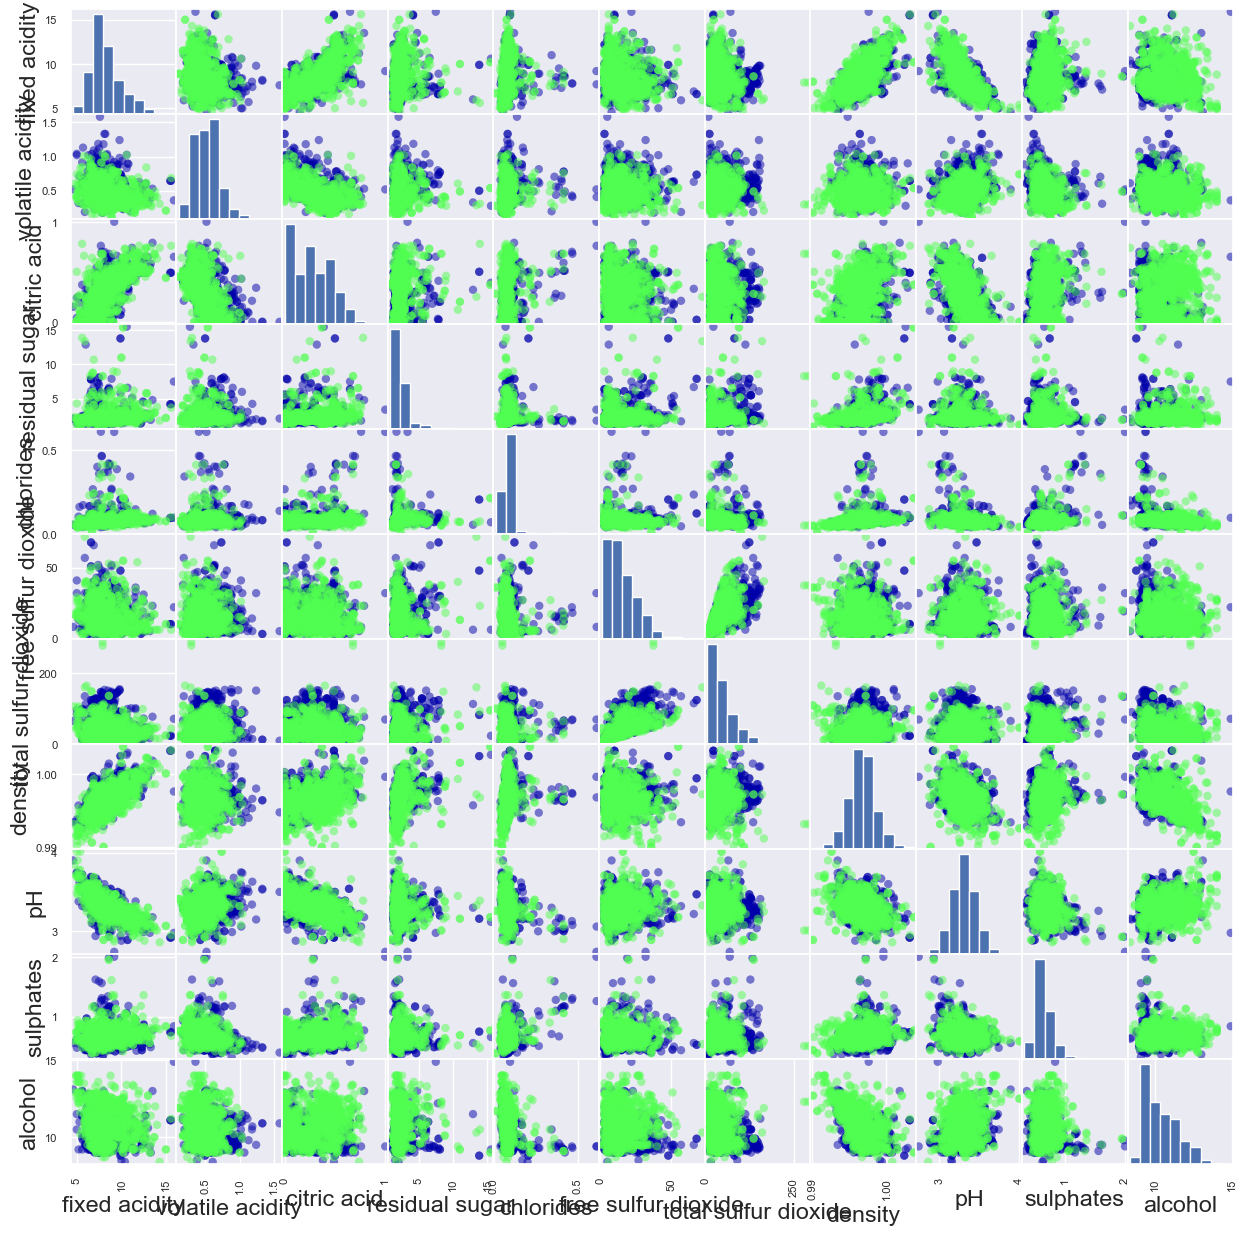

In [175]:
# 산점도행렬
pd.plotting.scatter_matrix(x, c=y, figsize = (15,15), marker = 'o', cmap = mglearn.cm3)
plt.show()

In [177]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
x_sample, y_sample = RandomUnderSampler(random_state = 0).fit_resample(x,y)
x_samp = pd.DataFrame(data = x_sample, columns = train_cols)
y_samp = pd.DataFrame(data = y_sample, columns = ['class'])
df2 = pd.concat([x_samp, y_samp], axis = 1)
df2['class'].value_counts()

class
0    744
1    744
Name: count, dtype: int64

In [178]:
x_samp 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
...,...,...,...,...,...,...,...,...,...,...,...
767,7.8,0.500,0.30,1.90,0.075,8.0,22.0,0.99590,3.31,0.56,10.4
1488,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4
1299,8.2,0.240,0.34,5.10,0.062,8.0,22.0,0.99740,3.22,0.94,10.9
1114,11.3,0.360,0.66,2.40,0.123,3.0,8.0,0.99642,3.20,0.53,11.9


In [185]:
y_samp = y_samp['class']

In [186]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(x_samp, y_samp, test_size = 0.2, random_state = 10 )

# 기본모형
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state = 0)
model.fit(x_tr, y_tr)
pred = model.predict(x_ts)

In [187]:
print('학습용:', model.score(x_tr, y_tr))
print('검증용:', model.score(x_ts, y_ts))
print('검증용:', np.mean(pred==y_ts))

학습용: 0.7445378151260504
검증용: 0.7449664429530202
검증용: 0.7449664429530202


In [188]:
# 표준화
x_tr_scaled = (x_tr - x_tr.mean(axis = 0)) / x_tr.std(axis = 0)
x_ts_scaled = (x_ts - x_tr.mean(axis = 0)) / x_tr.std(axis = 0)

# 표준화된 데이터로 다시 훈련
model_scaled = MLPClassifier(random_state = 0)
model_scaled.fit(x_tr_scaled, y_tr)

c:\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [190]:
# 최대 반복 횟수에 도달했다는 경고  : max_iter 반복횟수를 늘려야 함 (default: 200) 
# 오차가 개선되고 있는데 반복횟수가 끝나 종료될 경우, 경고메시지 >>> max_iter를 늘려야 함
print('학습용:', model_scaled.score(x_tr_scaled, y_tr))
print('검증용:', model_scaled.score(x_ts_scaled, y_ts))

학습용: 0.8134453781512605
검증용: 0.7986577181208053


In [192]:
# 최대 반복횟수 max_iter를 늘림
model_scaled_max = MLPClassifier(max_iter = 3000, random_state = 42)
model_scaled_max.fit(x_tr_scaled, y_tr)
print('학습용:', model_scaled_max.score(x_tr_scaled, y_tr))
print('검증용:', model_scaled_max.score(x_ts_scaled, y_ts))

학습용: 0.9932773109243698
검증용: 0.825503355704698


In [195]:
# 은닉층을 2개로 늘림
model_hd2 = MLPClassifier(max_iter=3000,hidden_layer_sizes=[100,100],random_state=0)
model_hd2.fit(x_tr_scaled, y_tr)
print("학습용:",model_hd2.score(x_tr_scaled, y_tr))
print("검증용:",model_hd2.score(x_ts_scaled, y_ts))

학습용: 0.9991596638655462
검증용: 0.8187919463087249


↑ 과대 적합된 상태 : over fitting (vs under fitting)

학습용과 검증용이 큰 차이가 나지 않는 것이 좋음

In [196]:
# 은닉층을 3개로 늘림
model_hd3 = MLPClassifier(max_iter=3000,hidden_layer_sizes=[100,100,100],random_state=0)
model_hd3.fit(x_tr_scaled, y_tr)
print("학습용:",model_hd3.score(x_tr_scaled, y_tr))
print("검증용:",model_hd3.score(x_ts_scaled, y_ts)) 

학습용: 1.0
검증용: 0.7919463087248322


↑ 오히려 성능이 안좋아짐. 모델이 너무 복잡해도 좋지 않음

In [197]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_ts_scaled)
confusion_matrix(y_ts, pred)

array([[112,  35],
       [ 58,  93]], dtype=int64)

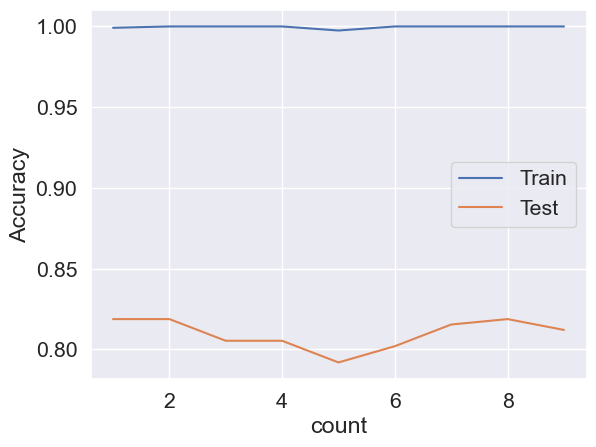

In [199]:
# 최적의 은닉노드 개수를 구하기 위한 실험
import numpy as np
import matplotlib.pyplot as plt

train_rate=[]
test_rate=[]
for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=0,
            hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(x_tr_scaled,y_tr)
        train_rate.append(model.score(x_tr_scaled,y_tr))
        test_rate.append(model.score(x_ts_scaled,y_ts))        
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [200]:
max_rate=max(test_rate)  # 최대값
idx=np.where(test_rate == max_rate)[0][0]  # 최대값의 인덱스값
print('idx:',idx)
print('최고정확도:',max_rate)        

cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

idx: 0
최고정확도: 0.8187919463087249
100 100


In [202]:
# Final: 실험을 통해 구한 최적의 은닉노드수로 만든 모형
model=MLPClassifier(max_iter=3000, hidden_layer_sizes=[100,100],random_state=0)
model.fit(x_tr_scaled,y_tr)
print(f'학습용:{model.score(x_tr_scaled,y_tr)*100:6.2f}%')   # format string 
print(f'검증용:{model.score(x_ts_scaled,y_ts)*100:6.2f}%')   # f'{변수:.2f} 소수점아래 2번째자리까지 (float 부동)

학습용: 99.92%
검증용: 81.88%
